In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
     

In [4]:
# Load in the insurance dataset
insurance = pd.read_csv("insurance.csv")
     

In [5]:
# Columns in the dataset
insurance.columns
     


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

array([[<AxesSubplot:title={'center':'charges'}>]], dtype=object)

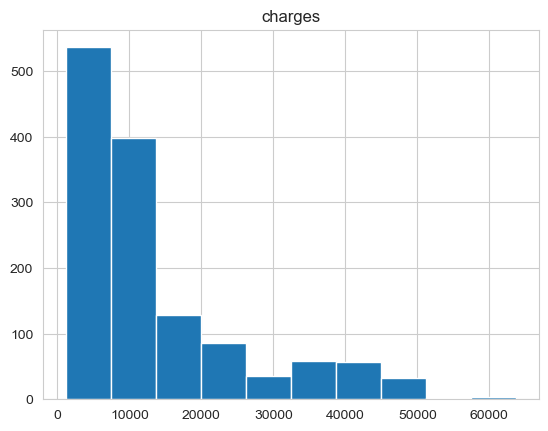

In [6]:
insurance.hist("charges")

array([[<AxesSubplot:title={'center':'log_charges'}>]], dtype=object)

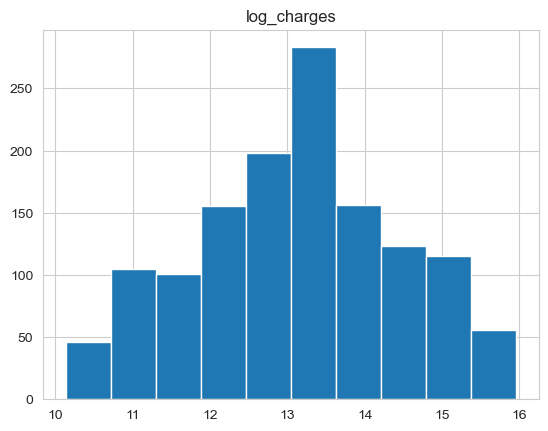

In [7]:
insurance["log_charges"] = np.log2(insurance["charges"])

insurance.hist("log_charges")
     

In [8]:
# Checking the correlation between the continuous columns in the insurance data
insurance.corr()
     

,age,bmi,children,charges,log_charges
age,1.000000,0.109272,0.042469,0.299008,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.892964
log_charges,0.527834,0.132669,0.161336,0.892964,1.000000


Comments on correlation
age has 30% correlation with charges, bmi has 19.8% correlation, and number of children has 6.7% correlation.

<AxesSubplot:title={'center':'log_charges'}, xlabel='sex'>

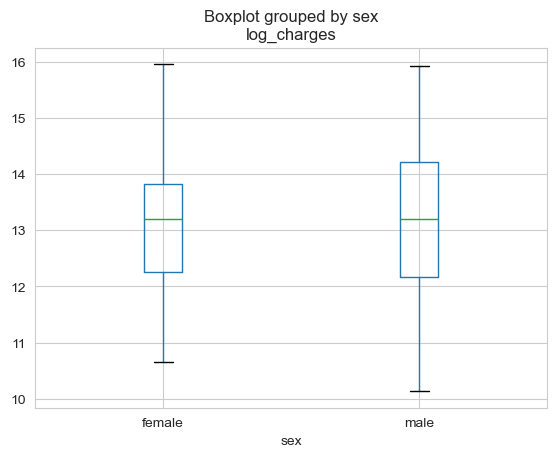

In [9]:
insurance.boxplot(column = ["log_charges"], by = "sex")

<AxesSubplot:title={'center':'log_charges'}, xlabel='smoker'>

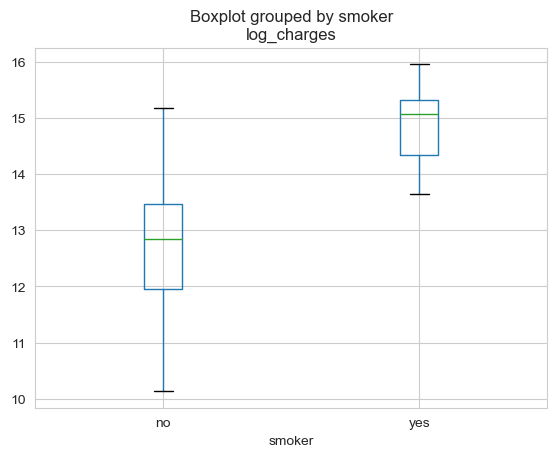

In [10]:
insurance.boxplot(column = ["log_charges"], by = "smoker")

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

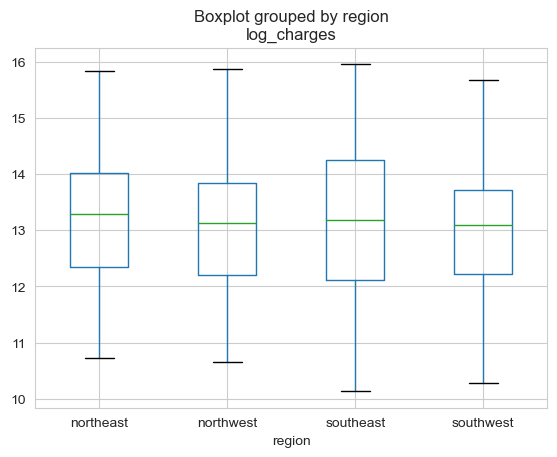

In [11]:
insurance.boxplot(column = ["log_charges"], by = "region")

<AxesSubplot:title={'center':'log_charges'}, xlabel='region'>

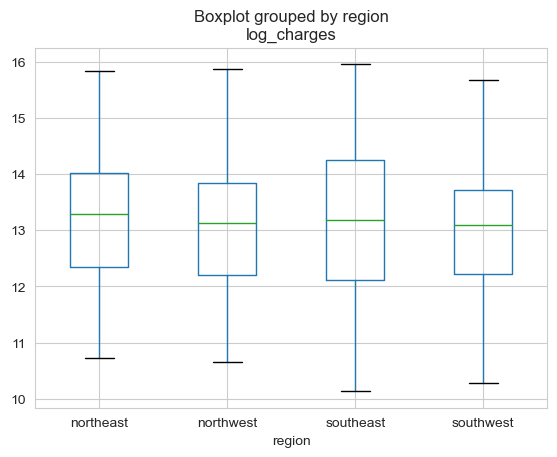

In [12]:
insurance.boxplot(column = ["log_charges"], by = "region")
     

Comments on plots
Males seem to have a wider distribution of charges compared to women. Smokers have much higher costs than non-smokers. There doesn't seem tobe many appreciable differences between regions.

In [13]:
# Splitting the data up into a training and test set
insurance["is_smoker"] = (insurance["smoker"] == "yes")
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

# 75% for training set, 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 1)
    

In [14]:
# Training and checking model performance on training set
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Get predicted values by model
y_pred = insurance_model.predict(X_train)

# MSE on the log scale for the insurance charges
mean_squared_error(y_train, y_pred)

0.4546665339270644

In [16]:
# MSE on the original scale for the insurance charges
np.exp(mean_squared_error(y_train, y_pred))

1.575647870310887

In [17]:
# Coefficient of determination
r2_score(y_train, y_pred)

0.7421118855283421

<AxesSubplot:xlabel='fitted', ylabel='residuals'>

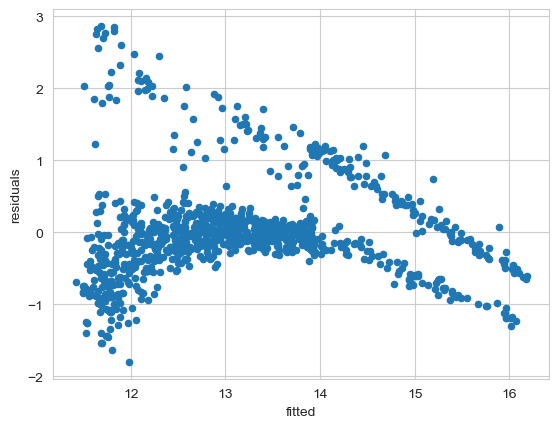

In [18]:
# Quick visual check of residuals
check = pd.DataFrame()
check["residuals"] = y_train - y_pred
check["fitted"] = y_pred

check.plot.scatter(x = "fitted", y = "residuals")

In [19]:
# Getting the non-intercept coefficients
insurance_model.coef_

array([0.04892865, 0.01523672, 2.23063344])

In [20]:
# Getting MSE on test model
test_pred = insurance_model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.4355350875308212

In [21]:
# Putting the outcome (in log-terms) back into the original scale
np.exp(mean_squared_error(y_test, test_pred))

1.5457899706350982

# Drawing Conclusions

The test MSE was about 0.435, while the training MSE was about 0.454. In this case, the two errors match up pretty well, so we can conclude that the model is not overfit. The residuals suggest that the model is predicting much lower costs for subjects who were actually charged much higher. Therefore the model struggles with these higher costs. As a whole, the model predictions are too conservative.

We might improve the model by including more complex terms in the regression, such as interactions or quadratic terms.